
# Training Models


# Linear Regression

<div class="alert alert-block alert-info">
<b>Eqn 1:</b> Linear Regrssion model prediction <br> $\hat{y} = θ_0
+ θ_1  
x_1
+ θ_2
x_2
+ ⋯ + θ_n
x_n $  <br> $\hat{y}$ = predicted value <br> 
    n = no of feature  <br>
    $x_i$ = $i^{th}$ feature value <br>
    $θ_j$ = $j^{th}$ model parameter
</div> 

<div class="alert alert-block alert-warning">
<b>Eqn 2:</b> Linear Regression model prediction (vectorized form) <br> 
    $\hat{y} = h_θ
(x) = θ · x$ <br> θ = model's parameter vector, containing bias term  $θ_0$ and the feature weights $θ_1$ to $θ_n$ <br> x = instance's feature vector, containing $x_0 to x_n$, with $x_0$ always equal to 1 <br> θ.x = dot product of vectors which equals to $θ_0x_0 +
θ_1x_1
+ θ_2x_2
+ ... + θ_nx_n$  <br> $h_θ$ = hypothesis function, using model parameters θ
</div>

<div class="alert alert-block alert-success">
<b>Eqn 3:</b> MSE cost function for a Linear Regression Model <br> 
    MSE(X,$h_\theta) = \frac{1}{m} \sum \limits_{i=1} ^ {m} (\theta^{T}x^{(i)} - y^{(i)} )^2$ <br> X = matrix containing all feature values <br> m =  no of instances in the dataset where RMSE is measured on <br> $x^i$ = vector of all feature values of $i^{th}$ instance in the dataset and $y^{(i)}$ label 
</div>



## The Normal Equation
To find the value of $\theta$ that minimizes the cost function, there is a closed-form solution (or, a mathematical equation that gives the result directly). This is called the normal equation.

<div class="alert alert-block alert-info"> <b>Eqn 4:</b> Normal Equation <br> $\hat{\theta}$=$(X^TX)^{-1} X^T y$ <br> $\hat{\theta}$ = value of $\theta$ that minimizes the cost function <br> y = vector of target values containing $y^{(1)} to y^{(m)}</div>

In [1]:
import numpy as np
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)

y = 4 + 3$x_1$ + Gaussian noise <br> .inv = inverse <br> .T = transpose <br> .dot = dot product

In [2]:
x_b = np.c_[np.ones((100,1)),x] # add x0 = 1 to each instance 
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [3]:
theta_best

array([[4.07292817],
       [2.83089167]])

$\theta_0$ = 4 and $\theta_1$ = 3

In [4]:
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new] # add x𝜃 = 1 to each instance
y_predict = x_new_b.dot(theta_best)
y_predict

array([[4.07292817],
       [9.73471152]])

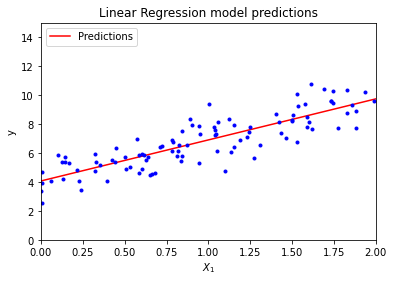

In [5]:
import matplotlib.pyplot as plt

plt.plot(x_new, y_predict, "r-",label="Predictions")
plt.plot(x,y,"b.")
plt.axis([0,2,0,15])
plt.title("Linear Regression model predictions")
plt.xlabel("$X_1$")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.07292817]), array([[2.83089167]]))

In [7]:
lin_reg.predict(x_new)

array([[4.07292817],
       [9.73471152]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b,y,rcond=1e-6) # lstsq = least squares
theta_best_svd

array([[4.07292817],
       [2.83089167]])

In [9]:
np.linalg.pinv(x_b).dot(y) # pinv = pseudo inverse

array([[4.07292817],
       [2.83089167]])

The pseudoinverse itself is computed using a standard matrix factorization technique called __Singular Value Decomposition (SVD)__ that can decompose the training set matrix X into the matrix multiplication of three matrices U Σ V⊺
(see numpy.linalg.svd()). The pseudoinverse is computed as $X^+ = V\sum^+U^T$.

## Computational Complexity
The Normal Equation computes the inverse of $X^T$ X, which is an (n + 1) × (n + 1) matrix (where n is the number of features). The computational complexity of inverting such a matrix is typically about O($n^{2.4}$) to O($n^3$), depending on the implementation.

Predictions are slow(roughly twice as much time) in computatinal complexity because it makes prediction on both the no of instances and no of features.

## Gradient Descent
It is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. It's general idea is to tweak parameters iteratively in order to minimize a cost function.

__Working__: It measures the local gradient error function with regard to the paramter vactor $\theta$, and it goes in the direction of descending gradient. Once the gradient is 0 , we have reached the minimum. <br> We start this by filling $\theta$ with random values (_random initialization_) taking one baby step at a time, each step attempting to decrease the cost function until the algorithm converges to a minimum. <br> Here, if the learning rate is too small, then the algorithm will hae to go through many iterations to converge taking longer time. Whereas, if the learning rate is too high, it might jump accross the valley and enf up on the other side making algorithm diverged, with larger values failing to find a good solution.

## Batch Gradient Descent
__Partial Derivative__: computing gradient of the cost function with regard to each model parameter $\theta_j$ (i.e how much the cost function will change if we change $\theta_j$ just a little bit

<div class="alert alert-block alert-info"> <b>Eqn 5</b> Parti(al derivatives of the cost function<br> $\frac{∂}{∂\theta_j}MSE(\theta)=\frac{2}{m} \sum\limits_m^{i=1} (\theta^Tx^{(i)}-y^{(i)})x{(i)}_j$ </div>

<div class="alert alert-block alert-warning"> <b>Eqn 6:</b> $\nabla_\theta MSE(\theta)$ = ($\frac{∂}{∂\theta_0}$MSE$(\theta)$ <br>$\frac{∂}{∂\theta_1}$MSE$(\theta)$<br>.<br>.<br>.<br>$\frac{∂}{∂\theta_n}$MSE$(\theta)$) = $\frac{2}{m}X^T(X\theta-y)$</div>

<div class="alert alert-block alert-success"><b>Eqn 7:</b>Gradient Descent Step<br>$\theta^{(next step)} = \theta -η\nabla_\theta MSE(\theta)$</div>

In [10]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta)-y)
    theta = theta-eta*gradients
theta

array([[4.07292817],
       [2.83089167]])

## Stochastic Gradient Descent
It picks a random instance in the training set at every step and computes the gradients based only on that single instance

In [11]:
n_epochs = 50
t0,t1 = 5,50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch* m+i)
        theta = theta - eta * gradients
    

While the Batch Gradient Descent code iterated 1,000 times through the whole training set, this code goes through the training set only 50 times and reaches a pretty good solution:

In [12]:
theta

array([[4.07324501],
       [2.85282292]])

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

SGDRegressos class to perform Linear Regression using Stochastic GD with Scikit-Learn. It defaults to optimizing the squared error cost function.

In [14]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.0728202]), array([2.83384271]))

## Mini-batch Gradient Descent
At each step, instead of computing the gradients based on the full training set
(as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called _mini-batches_.
_Advantage_: We can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

# Polynomial Regression
To fit nonlinear data using linear model by adding powers of each feature as new features, then training a model on this extended set of features, is called Polynomial Regression.

generating nonlinear data, based on a simple quadratic equation

In [15]:
m = 100
x = 6 * np.random.rand(m,1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m,1)

Using Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (second-degree polynomial) of each feature in the training set as a new feature (in this case there is just one feature):

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x[0], x_poly[0]


(array([2.16302586]), array([2.16302586, 4.67868085]))

Now, x_poly conrains the original feature of x plus the square of this feature.

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.98140663]), array([[1.08926337, 0.47826848]]))

## Learning Curves

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.title("Learning Curves")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend(loc="upper right")

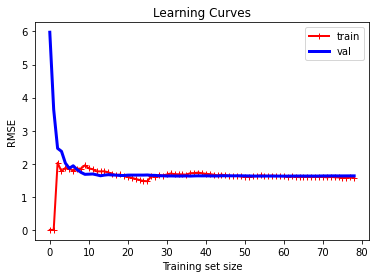

In [19]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)

__Performance on the training data__: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse.

__Performance on the validation data__: When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then, as the model is shown more training examples, it learns, and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.

These learning curves are typical of a model that’s underfitting. Both curves have reached a plateau; they are close and fairly high.

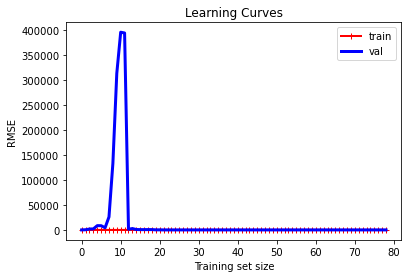

In [20]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg",LinearRegression())
])
plot_learning_curves(polynomial_regression, x, y)

<div class="alert alert-block alert-danger"><b>The Bias/Variance Trade-off</b><br>Bias: This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.<br><br>Variance: This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance and thus overfit the training data.<br><br><br>Irreducible error: This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

## Regularized Linear Models
For a linear model, regularization is typically achieved by constraining the weights of the model

### Ridge Regression
Also called _Tikhonov regularization_ is a regularized version of Linear Regression i.e a regularization term equal to $\alpha \sum\limits_{i=1}^n = \theta_i^2$ is addes to the cost function. This forces the learning algorithm to fit the data and keep the model weights as small as possible.

The hyperparameter $\alpha$ controls how much we want to regularize the model. If $\alpha$=0 then Ridge Regression is just linear regression but if $\alpha$ is very large, then all weights end up very close to 0 and the result is a flat line going through the data's mean.

<div class="alert alert-block alert-info"><b>Eqn 8: </b>Ridge Regression cost function<br>$J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum\limits_{i=1}^n \theta_i^2$</div>

<div class="alert alert-block alert-warning"><b>Eqn 9: </b>Ridge Regression closed-form solution<br>$\hat{\theta} = (X^TX+ \alpha A)^{-1} X^T y$</div>

In [21]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([[5.16850701]])

In [22]:
sgd_reg = SGDRegressor(penalty="l2") # "l2" indicates that we want SGD to add a regularization term to the cost function equal to half the square of the l^2 norm of the weight vector
sgd_reg.fit(x,y.ravel())
sgd_reg.predict([[1.5]])

array([5.15648343])

### Lasso Regression
_LASSO -> Least Absolute Shrinkage and Selection Operation_<br>
It is similar to Ridge Regression but it uses $l_1$ norm of the weight vector instead of half the square of $l_2$ norm.

<div class="alert alert-block alert-info"><b>Eqn 10: </b>Lasso Regression cost function<br>$J(\theta) = MSE(\theta) + \alpha \sum\limits_{i=1}^n |\theta_i|$</div>

<div class="alert alert-block alert-warning"><b>Eqn 11: </b>Lasso Regression subgradient vector<br>$g(\theta,J) = \nabla_\theta MSE(\theta) + \alpha(sign (\theta_1)$<br>$sign(\theta_2)$<br>.<br>.<br>.<br>$sign(\theta_n))$<br>where $sign(\theta_i)$: -1 if $\theta_i$ < 0 <br> 0 if $\theta_i$ = 0 <br> +1 if $\theta_i > 0$</div>

In [23]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([5.12563657])

In [24]:
sgd_reg = SGDRegressor(penalty="l1") 
sgd_reg.fit(x,y.ravel())
sgd_reg.predict([[1.5]])

array([5.15678286])

### Elastic Net
It is a middle ground between _Ridge Regression_ and _Lasso Regression._We can control mix ratio r. When r=0, elastic net is equivalent to ridge regression and when r=1, it is equivalent to lasso regression.

<div class="alert alert-block alert-info"><b>Een 12: </b>Elastic Net cost function<br>$J(\theta) = MSE(\theta) + r\alpha \sum\limits_{i=1}^n |\theta_i| + \frac{1-r}{2} \alpha \sum\limits_{i=1}^{n}\theta_i^2$</div>

In [25]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x, y)
elastic_net.predict([[1.5]])

array([5.1201421])

### Early Stopping
Regularizing algorithms by stopping training as soon as the validation error reaches a minimum. Also called as _beautiful free lunch_ as this method is simple and efficient.

In [26]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler


# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler",StandardScaler())
])
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
x_train_poly_scaled = poly_scaler.fit_transform(x_train)
x_val_poly_scaled = poly_scaler.transform(x_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant",eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(x_train_poly_scaled,y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(x_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

D:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

# Logistic Regression
It is used to estimate the probability that an instance belongs to a particular class.

## Estimating Probabilities

<div class="alert alert-block alert-info"><b>Eqn 13: </b>Logistic Regression model estimated probability (vectorized form)<br>$\hat{p} = h_\theta (x) = \sigma (x^T\theta)$</div>

<div class="alert alert-block alert-warning"><b>Eqn 14: </b>Logistic function<br>σ(t) = $\frac{1}{1+exp(-1)}$</div>

<div class="alert alert-block alert-success"><b>Eqn 15: </b>Logistic Regression model prediction<br>$\hat{y} =$ {0 if $\hat{p}<$0.5<br>1 if $\hat{p} >=$ 0.5 </div>

## Training and Cost Function
The objective of training is to set the parameter vector θ so that the model estimates high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0).

<div class="alert alert-block alert-info"><b>Eqn 16: </b>Cost function of a single training instance<br>$c(\theta)$ = {-log$(\hat{p})$ if y=1<br>$-log(1-\hat{p})$ if $y=0$</div>

<div class="alert alert-block alert-warning"><b>Eqn 17: </b>Logistic Regression cost function (log loss)<br>$J(\theta) = -\frac{1}{m} \sum\limits_{i=1}^m [y^{(i)}log(\hat{p}^{(i)}) + (1-y^{(i)})log(1-\hat{p}^{(i)})]$</div>

<div class="alert alert-block alert-success"><b>Eqn 18: </b>Logistic cost function partial derivatives<br>$\frac{∂}{∂\theta_j}J(\theta) = \frac{1}{m}\sum\limits_{i=1}^{m}(\sigma(\theta_T x^{(i)})-y^{(i)})x_j^{(i)}$</div>

## Decision Boundaries
Building a classifier to detect the Iris virginica type based only on the petal
width feature.

In [27]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [28]:
x = iris["data"][:,3:] # petal width
y = (iris["target"]==2).astype(np.int) # 1 if iris virginicia, else 0

In [29]:
# training logistic regression model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x,y)

LogisticRegression()

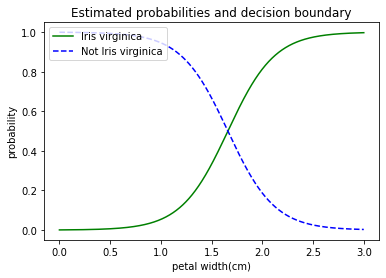

In [30]:
# estimating probabilities for flowers with petal widths varying 0-3cm

x_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)
plt.plot(x_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(x_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.title("Estimated probabilities and decision boundary")
plt.xlabel("petal width(cm)")
plt.ylabel("probability")
plt.legend(loc="upper left")

In [31]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

## Softmax Regression

<div class="alert alert-block alert-info"><b>Eqn 19: </b>Softmax score for class k<br>$s_k(x) = x^T\theta^{(k)}$</div>

<div class="alert alert-block alert-warning"><b>Eqn 20: </b>Softmax function<br>$\hat{p}_k$ = $\sigma (s(x))_k$ = $\frac{exp(s_k(x))}{\sum\limits_{j=1}^k exp(s_j(x))}$\'</div>

<div class="alert alert-block alert-success"><b>Eqn 21: </b>Softmax Regression classifier prediction<br>$\hat{y}$ = argmax $\sigma(s(x))_k$ = argmax $s_k(x)$ = argmax(($\theta^{(k)})^Tx)$</div>

<div class="alert alert-block alert-info"><b>Eqn 22: </b>Cross entropy cost function<br>$J(\theta) = -\frac{1}{m}\sum\limits_{k=1}^k y_k^{(i)} log(\hat{p}_k^{(i)})$</div>

<div class="alert alert-block alert-warning"><b>Eqn 23: </b>Cross entropy gradient vector for class k<br>$\nabla{_\theta^k} J(\theta) = \frac{1}{m} \sum\limits_{i=1}{m}(\hat{p}_k^{(i)}-y_k^{(i)})x^{(i)}$</div>

In [32]:
x = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(x, y)

LogisticRegression(C=10, multi_class='multinomial')

In [33]:
softmax_reg.predict([[5, 2]])

array([2])

In [34]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])